In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_16_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_16_3.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.0035)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 3s - loss: 0.3382 - accuracy: 0.8540 - val_loss: 0.2564 - val_accuracy: 0.8843
Epoch 2/150
100000/100000 - 2s - loss: 0.2320 - accuracy: 0.8967 - val_loss: 0.2223 - val_accuracy: 0.9018
Epoch 3/150
100000/100000 - 2s - loss: 0.2099 - accuracy: 0.9056 - val_loss: 0.2134 - val_accuracy: 0.9042
Epoch 4/150
100000/100000 - 2s - loss: 0.1977 - accuracy: 0.9108 - val_loss: 0.2005 - val_accuracy: 0.9101
Epoch 5/150
100000/100000 - 2s - loss: 0.1903 - accuracy: 0.9145 - val_loss: 0.1965 - val_accuracy: 0.9127
Epoch 6/150
100000/100000 - 2s - loss: 0.1839 - accuracy: 0.9177 - val_loss: 0.1854 - val_accuracy: 0.9181
Epoch 7/150
100000/100000 - 2s - loss: 0.1792 - accuracy: 0.9203 - val_loss: 0.1825 - val_accuracy: 0.9195
Epoch 8/150
100000/100000 - 1s - loss: 0.1729 - accuracy: 0.9238 - val_loss: 0.1821 - val_accuracy: 0.9202
Epoch 9/150
100000/100000 - 1s - loss: 0.1678 - accuracy: 0.9266 - val_loss: 0.1822 - val_accu

Epoch 77/150
100000/100000 - 2s - loss: 0.0429 - accuracy: 0.9834 - val_loss: 0.0892 - val_accuracy: 0.9729
Epoch 78/150
100000/100000 - 2s - loss: 0.0426 - accuracy: 0.9836 - val_loss: 0.0899 - val_accuracy: 0.9710
Epoch 79/150
100000/100000 - 2s - loss: 0.0410 - accuracy: 0.9841 - val_loss: 0.0925 - val_accuracy: 0.9715
Epoch 80/150
100000/100000 - 2s - loss: 0.0406 - accuracy: 0.9844 - val_loss: 0.0903 - val_accuracy: 0.9719
Epoch 81/150
100000/100000 - 2s - loss: 0.0407 - accuracy: 0.9843 - val_loss: 0.0998 - val_accuracy: 0.9694
Epoch 82/150
100000/100000 - 2s - loss: 0.0417 - accuracy: 0.9839 - val_loss: 0.0945 - val_accuracy: 0.9709
Epoch 83/150
100000/100000 - 2s - loss: 0.0417 - accuracy: 0.9840 - val_loss: 0.0976 - val_accuracy: 0.9697
Epoch 84/150
100000/100000 - 2s - loss: 0.0416 - accuracy: 0.9839 - val_loss: 0.0928 - val_accuracy: 0.9711
Epoch 85/150
100000/100000 - 2s - loss: 0.0383 - accuracy: 0.9852 - val_loss: 0.0886 - val_accuracy: 0.9731
Epoch 86/150
100000/100000 -

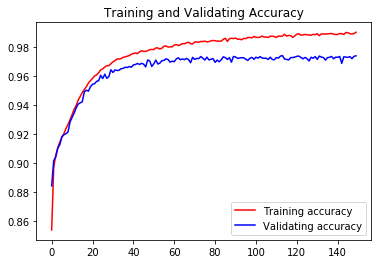

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_16_3_model.h5')